In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score,recall_score,precision_score,
confusion_matrix,ConfusionMatrixDisplay,
precision_recall_curve,roc_auc_score,roc_curve)

In [2]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
df = data.drop('index',axis=1)

In [3]:
X = df.iloc[:,:-1]
y = df['Heart Disease']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [5]:
labelenc = LabelEncoder()
y_train = labelenc.fit_transform(y_train)
y_test = labelenc.transform(y_test)

Accuracy: 0.91
Precision: 0.79
Recall: 1.00



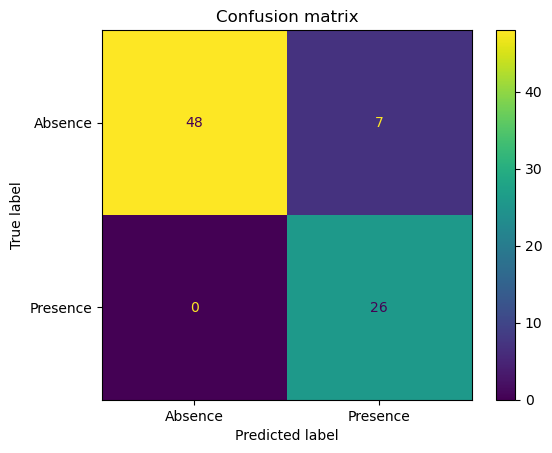

In [6]:
rfc = RandomForestClassifier(n_estimators=90,max_depth=5,min_samples_split=20)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

metrics = f"""Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
"""
print(metrics)

cm_matrix = ConfusionMatrixDisplay(cm,display_labels=labelenc.classes_)
cm_matrix.plot()
plt.title('Confusion matrix')

plt.show()

In [7]:
df.shape

(270, 14)

In [9]:
y_probs = rfc.predict_proba(X_test)
y_score_pos = y_probs[:,1]

In [10]:
# y_probs

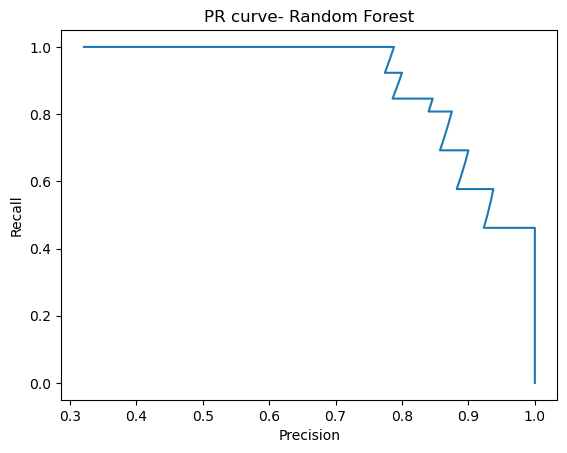

In [11]:
# precision_recall curve:
pre,rec,threshold = precision_recall_curve(y_test,y_score_pos)
plt.plot(pre,rec)

plt.title('PR curve- Random Forest')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.show()